In [18]:
import sys
import numpy as np
import pandas as pd
import joblib
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv("../data/train_ig.csv")
df_test = pd.read_csv("../data/test_ig.csv")

print(f"Train shape: {df_train.shape}, Test shape: {df_test.shape}")

# ==== 2. Pilih fitur dan target ====

selected_features = ['followers', 'profile_pic', 'follows', 'fullname_words',
                'fullname_num_ratio', 'followers_to_follows_ratio', 'username_num_ratio',
                'name_equals_username']
target_column = 'fake'
df_train
df_test

Train shape: (4000, 11), Test shape: (1000, 11)


,profile_pic,username_num_ratio,username_is_numeric,fullname_words,fullname_num_ratio,is_name_number_only,name_equals_username,followers,follows,followers_to_follows_ratio,fake
0,1,0.000000,0,2,0.00,0,0,151,126,1.188976,0
1,1,0.000000,0,2,0.00,0,0,9884,1173,8.419080,0
2,1,0.000000,0,2,0.00,0,0,945,583,1.618151,0
3,1,0.000000,0,2,0.00,0,0,34670,1878,18.451304,0
4,1,0.000000,0,0,0.00,0,0,15338538,61,247395.774194,0
...,...,...,...,...,...,...,...,...,...,...,...
995,0,0.369476,0,1,0.33,0,0,47,9,4.700000,1
996,0,0.212266,0,1,0.00,0,0,72,4,14.400000,1
997,0,0.383606,0,1,0.00,0,0,37,18,1.947368,1
998,0,0.820413,0,0,0.00,0,0,50,39,1.250000,1


In [5]:
# Pastikan semuanya float (atau int)
for feature in selected_features:
    for df in [df_train, df_test]:
        if np.issubdtype(df[feature].dtype, np.datetime64):
            df[feature] = pd.to_datetime(df[feature]).astype(np.int64) // 10**9
        else:
            df[feature] = df[feature].astype(float)

In [6]:
X_train = df_train[selected_features]
y_train = df_train[target_column].astype(int)
X_test = df_test[selected_features]
y_test = df_test[target_column].astype(int)

In [9]:
# Normalisasi fitur (opsional untuk Random Forest, tapi bagus untuk PCA/visualisasi)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Inisialisasi model
model = RandomForestClassifier(n_estimators=100,
    random_state=1337,
    max_depth=13,
    min_samples_leaf=1,
    verbose=2)

In [11]:
# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print("\nHasil Cross-Validation:")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 1

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [12]:
# Latih model pada seluruh data latih
model.fit(X_train_scaled, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test_scaled)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [13]:
# Evaluasi model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       509
           1       0.99      0.98      0.99       491

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Confusion Matrix:
[[506   3]
 [  8 483]]


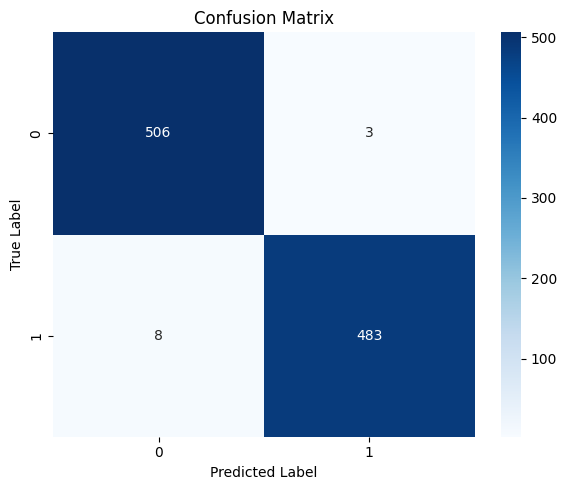

Akurasi akhir di data uji: 0.9890


In [14]:
# Visualisasi confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Tampilkan akurasi akhir
print(f"Akurasi akhir di data uji: {accuracy_score(y_test, y_pred):.4f}")

In [15]:
df_test["predicted_account_type"] = y_pred
df_test.to_csv("../data/test_with_predictions_IG.csv", index=False)

AUC Score: 0.9988


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


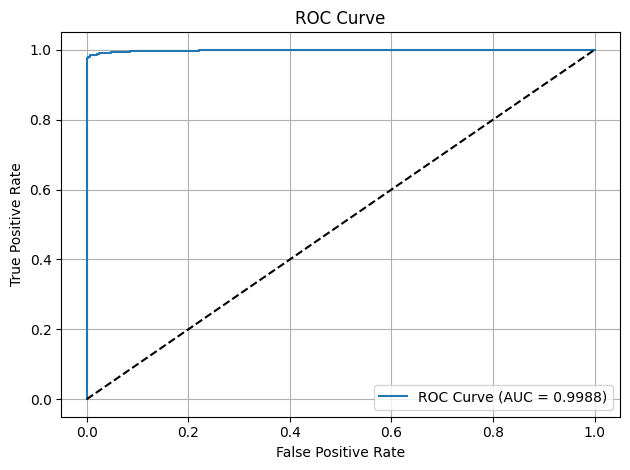

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Cek jumlah kelas (untuk multiclass support)
num_classes = len(np.unique(y_test))

# Probabilitas prediksi
y_proba = model.predict_proba(X_test_scaled)

# ==== Hitung skor AUC ====
if num_classes == 2:
    # Binary classification
    auc_score = roc_auc_score(y_test, y_proba[:, 1])
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])

    print(f"AUC Score: {auc_score:.4f}")

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')  # garis diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    # Multiclass classification
    # Binarize label
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    
    auc_score = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")
    print(f"Multiclass AUC Score: {auc_score:.4f}")

    # Plot ROC curve untuk tiap kelas
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_proba[:, i]):.4f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (Multiclass)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Save Model

In [19]:
joblib.dump(model, "../models/IG_BOT_Detection_Model_v1.pkl")

['../models/IG_BOT_Detection_Model_v1.pkl']